# Explore Data
Notebook for providing insights about the available training data

In [38]:
# ============================================================================================================
# Import section
# ============================================================================================================
import autoreload

%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np

from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
# ============================================================================================================
# Load Data
# ============================================================================================================

# Get Working Directory 
src_dir = os.getcwd()
print("Working directory: \t\t", src_dir)

# Data directory
data_dir = os.path.join(src_dir, "data")
print("Path for data files: \t\t", data_dir)

# Source path for training data
train_data_path = os.path.join(data_dir, "train.csv")
print("Path to trainign data file: \t", train_data_path)

Working directory: 		 C:\Users\dpere\Documents\combient_challenge
Path for data files: 		 C:\Users\dpere\Documents\combient_challenge\data
Path to trainign data file: 	 C:\Users\dpere\Documents\combient_challenge\data\train.csv


In [40]:
# Load training data as dataframe
pd_train = pd.read_csv(train_data_path)

# Display first 5 rows of dataframe
pd_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [41]:
# We know from the problem decrition that: 
# - Column "ID" refers to a customer
# - Column "TARGET" refers to the values to be predicted
# The rest of the columns correspond to the features

# List of strings corresponding to features column names
l_feat_cols =  [x for x in pd_train.columns if not x in ['ID','TARGET']]

# Number of training samples
n_samples = pd_train.shape[0]

print("\nNumber of training samples available: ", n_samples)
print("Number of feature columns: \t\t", len(l_feat_cols))



Number of training samples available:  76020
Number of feature columns: 		 369


<div class="alert alert-block alert-info">
We note note that there are a lot of possible features to use and that we have over 70k data samples available. 

Lets see how our binary classes present in the dataset are divided.
</div>

In [42]:
# Identify distribution of classes
target_vals = pd.DataFrame(pd_train.TARGET.value_counts())
target_vals["Percent"] = target_vals.TARGET / n_samples
# Visualize values dataframe
display(target_vals)

print("Percentage of Satisfied customers: \t", np.around(target_vals.Percent[0]*100, decimals=2), "%")
print("Percentage of Unsatisfied customers: \t", np.around(target_vals.Percent[1]*100, decimals=2), "%")

,TARGET,Percent
0,73012,0.960431
1,3008,0.039569


Percentage of Satisfied customers: 	 96.04 %
Percentage of Unsatisfied customers: 	 3.96 %


<div class="alert alert-block alert-info">
This shows that the classes are highly imbalanced. This might represent a risk when training a model, as the model may infere that always predicting class "0" would be a good approxiamte.

If evaluating the performance of the model is always based on the accuracy, then we might get results similar to 90% even if the model fails to identify class "1". So choosing the AUC of the ROC curve is a better performance metric.

As collecting more data is not an option, it might be helpful to oversample the minority class or undersample the majority class. 

Before proceeding, lets try to analyze more the features. 
</div>

In [43]:
# Extract feature columns
pd_train_features = pd_train[l_feat_cols]
pd_train_features.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [44]:
# Get columns only containing one, two or 3 possible values 
single_valued_column = []
doubled_valued_column = []
tripple_valued_column = []

# Possible candidates for normalization
norm_col1K_candidates = []
norm_col5k_candidates = []
norm_col10k_candidates = []
norm_colUpper10k_candidates = []

for col in l_feat_cols:
    print("Value counts for column: ", col )
    temp_counts = pd.DataFrame(pd_train_features[col].value_counts())
    display(temp_counts)
    
    n_values = temp_counts.shape[0]
    
    if n_values == 1:
        single_valued_column.append(col)
    elif n_values == 2:
        doubled_valued_column.append(col)
    elif n_values == 3:
        tripple_valued_column.append(col)
    elif n_values > 3:
        if 100 < n_values <= 1000:
            norm_col1K_candidates.append(col)
        elif 1000 < n_values <= 5000:
            norm_col5k_candidates.append(col)
        elif 5000 < n_values <= 10000:
            norm_col10k_candidates.append(col)
        elif 10000 < n_values < n_samples:
            norm_colUpper10k_candidates.append(col)

Value counts for column:  var3


,var3
2,74165
8,138
-999999,116
9,110
3,108
1,105
13,98
7,97
4,86
12,85


Value counts for column:  var15


,var15
23,20170
24,6232
25,4217
26,3270
27,2861
28,2173
31,1798
29,1727
30,1640
32,1592


Value counts for column:  imp_ent_var16_ult1


,imp_ent_var16_ult1
0.00,72301
300.00,221
150.00,217
600.00,172
900.00,164
3.00,141
450.00,124
60.00,123
1500.00,119
90.00,112


Value counts for column:  imp_op_var39_comer_ult1


,imp_op_var39_comer_ult1
0.00,66075
30.00,120
60.00,100
15.00,56
90.00,48
45.00,36
4.50,36
120.00,32
150.00,32
2.67,29


Value counts for column:  imp_op_var39_comer_ult3


,imp_op_var39_comer_ult3
0.00,64330
30.00,161
60.00,91
4.50,72
15.00,60
90.00,53
45.00,36
150.00,35
120.00,31
2.67,31


Value counts for column:  imp_op_var40_comer_ult1


,imp_op_var40_comer_ult1
0.00,75725
30.00,2
396.00,2
180.00,2
17.25,1
1436.19,1
1370.49,1
192.24,1
2521.86,1
47.70,1


Value counts for column:  imp_op_var40_comer_ult3


,imp_op_var40_comer_ult3
0.00,75672
30.00,3
4.50,2
1775.10,1
4251.06,1
1370.49,1
956.73,1
192.24,1
2521.86,1
47.70,1


Value counts for column:  imp_op_var40_efect_ult1


,imp_op_var40_efect_ult1
0.00,75982
900.00,6
1800.00,4
600.00,3
60.00,3
270.00,2
120.00,2
450.00,2
300.00,2
74.28,1


Value counts for column:  imp_op_var40_efect_ult3


,imp_op_var40_efect_ult3
0.00,75975
900.00,6
1800.00,4
120.00,4
300.00,2
330.00,2
960.00,2
600.00,2
60.00,2
450.00,2


Value counts for column:  imp_op_var40_ult1


,imp_op_var40_ult1
0.00,75791
900.00,2
450.00,2
600.00,2
1800.00,2
567.00,2
270.00,2
277.62,1
1775.10,1
643.65,1


Value counts for column:  imp_op_var41_comer_ult1


,imp_op_var41_comer_ult1
0.00,66226
30.00,120
60.00,101
15.00,56
90.00,48
4.50,36
45.00,35
150.00,32
120.00,32
2.67,29


Value counts for column:  imp_op_var41_comer_ult3


,imp_op_var41_comer_ult3
0.00,64480
30.00,161
60.00,91
4.50,72
15.00,60
90.00,53
45.00,36
150.00,35
2.67,31
120.00,31


Value counts for column:  imp_op_var41_efect_ult1


,imp_op_var41_efect_ult1
0.00,69336
60.00,1124
120.00,644
180.00,294
240.00,259
300.00,245
360.00,177
420.00,176
210.00,168
600.00,165


Value counts for column:  imp_op_var41_efect_ult3


,imp_op_var41_efect_ult3
0.00,67372
60.00,1570
120.00,694
180.00,352
240.00,279
300.00,274
150.00,203
360.00,193
420.00,188
210.00,184


Value counts for column:  imp_op_var41_ult1


,imp_op_var41_ult1
0.00,64388
60.00,557
120.00,202
30.00,101
300.00,87
180.00,81
150.00,79
240.00,67
90.00,60
420.00,55


Value counts for column:  imp_op_var39_efect_ult1


,imp_op_var39_efect_ult1
0.00,69325
60.00,1125
120.00,643
180.00,294
240.00,259
300.00,247
420.00,177
360.00,177
210.00,168
600.00,166


Value counts for column:  imp_op_var39_efect_ult3


,imp_op_var39_efect_ult3
0.00,67360
60.00,1569
120.00,694
180.00,352
240.00,279
300.00,274
150.00,203
360.00,194
420.00,189
210.00,184


Value counts for column:  imp_op_var39_ult1


,imp_op_var39_ult1
0.00,64271
60.00,556
120.00,201
30.00,101
300.00,87
180.00,81
150.00,79
240.00,66
90.00,60
420.00,55


Value counts for column:  imp_sal_var16_ult1


,imp_sal_var16_ult1
0.00,75924
3000.00,9
1500.00,5
600.00,4
450.00,3
750.00,3
150.00,3
3600.00,2
3300.00,2
1620.00,2


Value counts for column:  ind_var1_0


,ind_var1_0
0,75149
1,871


Value counts for column:  ind_var1


,ind_var1
0,75734
1,286


Value counts for column:  ind_var2_0


,ind_var2_0
0,76020


Value counts for column:  ind_var2


,ind_var2
0,76020


Value counts for column:  ind_var5_0


,ind_var5_0
1,72829
0,3191


Value counts for column:  ind_var5


,ind_var5
1,50459
0,25561


Value counts for column:  ind_var6_0


,ind_var6_0
0,76012
1,8


Value counts for column:  ind_var6


,ind_var6
0,76018
1,2


Value counts for column:  ind_var8_0


,ind_var8_0
0,73524
1,2496


Value counts for column:  ind_var8


,ind_var8
0,73846
1,2174


Value counts for column:  ind_var12_0


,ind_var12_0
0,70887
1,5133


Value counts for column:  ind_var12


,ind_var12
0,72564
1,3456


Value counts for column:  ind_var13_0


,ind_var13_0
0,72048
1,3972


Value counts for column:  ind_var13_corto_0


,ind_var13_corto_0
0,72756
1,3264


Value counts for column:  ind_var13_corto


,ind_var13_corto
0,72867
1,3153


Value counts for column:  ind_var13_largo_0


,ind_var13_largo_0
0,75247
1,773


Value counts for column:  ind_var13_largo


,ind_var13_largo
0,75260
1,760


Value counts for column:  ind_var13_medio_0


,ind_var13_medio_0
0,76018
1,2


Value counts for column:  ind_var13_medio


,ind_var13_medio
0,76018
1,2


Value counts for column:  ind_var13


,ind_var13
0,72154
1,3866


Value counts for column:  ind_var14_0


,ind_var14_0
0,74222
1,1798


Value counts for column:  ind_var14


,ind_var14
0,75617
1,403


Value counts for column:  ind_var17_0


,ind_var17_0
0,75883
1,137


Value counts for column:  ind_var17


,ind_var17
0,75910
1,110


Value counts for column:  ind_var18_0


,ind_var18_0
0,76018
1,2


Value counts for column:  ind_var18


,ind_var18
0,76018
1,2


Value counts for column:  ind_var19


,ind_var19
0,75701
1,319


Value counts for column:  ind_var20_0


,ind_var20_0
0,75744
1,276


Value counts for column:  ind_var20


,ind_var20
0,75815
1,205


Value counts for column:  ind_var24_0


,ind_var24_0
0,72799
1,3221


Value counts for column:  ind_var24


,ind_var24
0,73140
1,2880


Value counts for column:  ind_var25_cte


,ind_var25_cte
0,74011
1,2009


Value counts for column:  ind_var26_0


,ind_var26_0
0,74147
1,1873


Value counts for column:  ind_var26_cte


,ind_var26_cte
0,73925
1,2095


Value counts for column:  ind_var26


,ind_var26
0,74147
1,1873


Value counts for column:  ind_var25_0


,ind_var25_0
0,74223
1,1797


Value counts for column:  ind_var25


,ind_var25
0,74223
1,1797


Value counts for column:  ind_var27_0


,ind_var27_0
0,76020


Value counts for column:  ind_var28_0


,ind_var28_0
0,76020


Value counts for column:  ind_var28


,ind_var28
0,76020


Value counts for column:  ind_var27


,ind_var27
0,76020


Value counts for column:  ind_var29_0


,ind_var29_0
0,76012
1,8


Value counts for column:  ind_var29


,ind_var29
0,76018
1,2


Value counts for column:  ind_var30_0


,ind_var30_0
1,75677
0,343


Value counts for column:  ind_var30


,ind_var30
1,55710
0,20310


Value counts for column:  ind_var31_0


,ind_var31_0
0,75695
1,325


Value counts for column:  ind_var31


,ind_var31
0,75741
1,279


Value counts for column:  ind_var32_cte


,ind_var32_cte
0,75928
1,92


Value counts for column:  ind_var32_0


,ind_var32_0
0,75938
1,82


Value counts for column:  ind_var32


,ind_var32
0,75938
1,82


Value counts for column:  ind_var33_0


,ind_var33_0
0,75963
1,57


Value counts for column:  ind_var33


,ind_var33
0,75972
1,48


Value counts for column:  ind_var34_0


,ind_var34_0
0,76018
1,2


Value counts for column:  ind_var34


,ind_var34
0,76018
1,2


Value counts for column:  ind_var37_cte


,ind_var37_cte
0,70524
1,5496


Value counts for column:  ind_var37_0


,ind_var37_0
0,71059
1,4961


Value counts for column:  ind_var37


,ind_var37
0,71059
1,4961


Value counts for column:  ind_var39_0


,ind_var39_0
1,66955
0,9065


Value counts for column:  ind_var40_0


,ind_var40_0
0,75152
1,868


Value counts for column:  ind_var40


,ind_var40
0,75737
1,283


Value counts for column:  ind_var41_0


,ind_var41_0
1,66843
0,9177


Value counts for column:  ind_var41


,ind_var41
0,76020


Value counts for column:  ind_var39


,ind_var39
0,75737
1,283


Value counts for column:  ind_var44_0


,ind_var44_0
0,75877
1,143


Value counts for column:  ind_var44


,ind_var44
0,75891
1,129


Value counts for column:  ind_var46_0


,ind_var46_0
0,76020


Value counts for column:  ind_var46


,ind_var46
0,76020


Value counts for column:  num_var1_0


,num_var1_0
0,75149
3,869
6,2


Value counts for column:  num_var1


,num_var1
0,75734
3,285
6,1


Value counts for column:  num_var4


,num_var4
1,38147
0,19528
2,12692
3,4377
4,1031
5,203
6,36
7,6


Value counts for column:  num_var5_0


,num_var5_0
3,72336
0,3191
6,484
9,7
15,2


Value counts for column:  num_var5


,num_var5
3,50265
0,25561
6,190
9,3
15,1


Value counts for column:  num_var6_0


,num_var6_0
0,76012
3,8


Value counts for column:  num_var6


,num_var6
0,76018
3,2


Value counts for column:  num_var8_0


,num_var8_0
0,73524
3,2495
6,1


Value counts for column:  num_var8


,num_var8
0,73846
3,2174


Value counts for column:  num_var12_0


,num_var12_0
0,70887
3,4954
6,174
9,3
111,1
15,1


Value counts for column:  num_var12


,num_var12
0,72564
3,3418
6,37
15,1


Value counts for column:  num_var13_0


,num_var13_0
0,72048
3,3740
6,200
9,22
12,7
15,2
18,1


Value counts for column:  num_var13_corto_0


,num_var13_corto_0
0,72756
3,3226
6,38


Value counts for column:  num_var13_corto


,num_var13_corto
0,72867
3,3151
6,2


Value counts for column:  num_var13_largo_0


,num_var13_largo_0
0,75247
3,636
6,112
9,18
12,4
15,2
18,1


Value counts for column:  num_var13_largo


,num_var13_largo
0,75260
3,652
6,93
9,9
12,3
15,2
18,1


Value counts for column:  num_var13_medio_0


,num_var13_medio_0
0,76018
3,2


Value counts for column:  num_var13_medio


,num_var13_medio
0,76018
3,2


Value counts for column:  num_var13


,num_var13
0,72154
3,3712
6,135
9,12
12,4
15,2
18,1


Value counts for column:  num_var14_0


,num_var14_0
0,74222
3,1791
6,5
111,1
12,1


Value counts for column:  num_var14


,num_var14
0,75617
3,399
6,3
12,1


Value counts for column:  num_var17_0


,num_var17_0
0,75883
3,68
6,31
9,15
12,10
15,6
24,2
18,2
36,1
27,1


Value counts for column:  num_var17


,num_var17
0,75910
3,55
6,28
9,11
12,7
15,5
18,2
27,1
21,1


Value counts for column:  num_var18_0


,num_var18_0
0,76018
3,2


Value counts for column:  num_var18


,num_var18
0,76018
3,2


Value counts for column:  num_var20_0


,num_var20_0
0,75744
3,276


Value counts for column:  num_var20


,num_var20
0,75815
3,205


Value counts for column:  num_var24_0


,num_var24_0
0,72799
3,3208
6,12
9,1


Value counts for column:  num_var24


,num_var24
0,73140
3,2877
6,3


Value counts for column:  num_var26_0


,num_var26_0
0,74147
3,1574
6,240
9,42
12,12
15,2
33,1
27,1
21,1


Value counts for column:  num_var26


,num_var26
0,74147
3,1574
6,240
9,42
12,12
15,2
33,1
27,1
21,1


Value counts for column:  num_var25_0


,num_var25_0
0,74223
3,1525
6,216
9,40
12,11
15,2
33,1
27,1
21,1


Value counts for column:  num_var25


,num_var25
0,74223
3,1525
6,216
9,40
12,11
15,2
33,1
27,1
21,1


Value counts for column:  num_op_var40_hace2


,num_op_var40_hace2
0,75918
3,26
6,18
9,16
12,10
15,8
24,4
18,4
21,3
27,2


Value counts for column:  num_op_var40_hace3


,num_op_var40_hace3
0,76013
3,3
6,2
48,1
9,1


Value counts for column:  num_op_var40_ult1


,num_op_var40_ult1
0,75791
3,56
6,34
9,22
12,22
15,17
18,13
24,13
21,9
33,6


Value counts for column:  num_op_var40_ult3


,num_op_var40_ult3
0,75772
3,48
6,39
12,27
24,17
15,16
9,15
21,12
18,9
30,8


Value counts for column:  num_op_var41_hace2


,num_op_var41_hace2
0,67679
3,2617
6,1405
9,865
12,624
15,467
18,377
21,313
24,255
27,242


Value counts for column:  num_op_var41_hace3


,num_op_var41_hace3
0,75044
3,491
6,206
9,107
12,55
15,36
18,19
21,19
30,10
24,8


Value counts for column:  num_op_var41_ult1


,num_op_var41_ult1
0,64388
3,2929
6,1742
9,1090
12,811
15,733
18,619
21,503
24,400
27,365


Value counts for column:  num_op_var41_ult3


,num_op_var41_ult3
0,62355
3,3024
6,1816
9,1237
12,896
15,745
18,638
21,550
24,447
27,408


Value counts for column:  num_op_var39_hace2


,num_op_var39_hace2
0,67609
3,2629
6,1416
9,874
12,633
15,472
18,377
21,314
24,260
27,247


Value counts for column:  num_op_var39_hace3


,num_op_var39_hace3
0,75037
3,494
6,208
9,108
12,55
15,36
18,19
21,19
30,10
24,8


Value counts for column:  num_op_var39_ult1


,num_op_var39_ult1
0,64271
3,2948
6,1746
9,1096
12,821
15,734
18,632
21,505
24,414
27,369


Value counts for column:  num_op_var39_ult3


,num_op_var39_ult3
0,62244
3,3028
6,1827
9,1237
12,908
15,753
18,635
21,556
24,462
27,409


Value counts for column:  num_var27_0


,num_var27_0
0,76020


Value counts for column:  num_var28_0


,num_var28_0
0,76020


Value counts for column:  num_var28


,num_var28
0,76020


Value counts for column:  num_var27


,num_var27
0,76020


Value counts for column:  num_var29_0


,num_var29_0
0,76012
3,8


Value counts for column:  num_var29


,num_var29
0,76018
3,2


Value counts for column:  num_var30_0


,num_var30_0
3,68086
6,5657
9,1760
0,343
12,152
15,17
114,1
33,1
24,1
21,1


Value counts for column:  num_var30


,num_var30
3,51452
0,20310
6,3901
9,319
12,28
15,7
33,1
21,1
18,1


Value counts for column:  num_var31_0


,num_var31_0
0,75695
3,244
6,39
9,18
15,8
12,8
18,3
24,2
36,1
27,1


Value counts for column:  num_var31


,num_var31
0,75741
3,217
6,31
9,14
12,7
15,6
18,2
27,1
21,1


Value counts for column:  num_var32_0


,num_var32_0
0,75938
3,60
6,20
12,1
9,1


Value counts for column:  num_var32


,num_var32
0,75938
3,60
6,20
12,1
9,1


Value counts for column:  num_var33_0


,num_var33_0
0,75963
3,51
6,5
12,1


Value counts for column:  num_var33


,num_var33
0,75972
3,43
6,5


Value counts for column:  num_var34_0


,num_var34_0
0,76018
3,2


Value counts for column:  num_var34


,num_var34
0,76018
3,2


Value counts for column:  num_var35


,num_var35
3,37921
0,19528
6,12327
9,4570
12,1237
15,320
18,82
21,19
24,7
27,4


Value counts for column:  num_var37_med_ult2


,num_var37_med_ult2
0,72452
3,2132
6,758
9,324
12,141
15,89
18,43
21,32
27,12
24,9


Value counts for column:  num_var37_0


,num_var37_0
0,71059
3,2637
6,1083
9,523
12,307
15,136
18,98
21,53
30,30
27,25


Value counts for column:  num_var37


,num_var37
0,71059
3,2637
6,1083
9,523
12,307
15,136
18,98
21,53
30,30
27,25


Value counts for column:  num_var39_0


,num_var39_0
3,65013
0,9065
6,1817
9,111
12,9
15,2
33,1
21,1
18,1


Value counts for column:  num_var40_0


,num_var40_0
0,75152
3,867
6,1


Value counts for column:  num_var40


,num_var40
0,75737
3,283


Value counts for column:  num_var41_0


,num_var41_0
3,65398
0,9177
6,1359
9,75
12,6
15,2
33,1
21,1
18,1


Value counts for column:  num_var41


,num_var41
0,76020


Value counts for column:  num_var39


,num_var39
0,75737
3,283


Value counts for column:  num_var42_0


,num_var42_0
3,70242
6,5126
0,436
9,203
12,9
15,2
114,1
18,1


Value counts for column:  num_var42


,num_var42
3,52064
0,21908
6,2012
9,31
12,3
18,1
15,1


Value counts for column:  num_var44_0


,num_var44_0
0,75877
3,142
6,1


Value counts for column:  num_var44


,num_var44
0,75891
3,129


Value counts for column:  num_var46_0


,num_var46_0
0,76020


Value counts for column:  num_var46


,num_var46
0,76020


Value counts for column:  saldo_var1


,saldo_var1
0.00,75734
900.00,2
4035.00,2
2003.13,1
1592.64,1
478.26,1
1224.87,1
17.25,1
50.82,1
1370.49,1


Value counts for column:  saldo_var5


,saldo_var5
0.00,25561
3.00,18797
90.00,5267
30.00,1858
15.00,1662
6.00,1118
150.00,924
60.00,820
300.00,470
120.00,331


Value counts for column:  saldo_var6


,saldo_var6
0.0,76018
19531.8,1
11976.6,1


Value counts for column:  saldo_var8


,saldo_var8
0.00,73846
3.00,23
30.00,15
15.00,15
150.00,11
750.00,10
1500.00,10
60.00,10
900.00,6
300.00,6


Value counts for column:  saldo_var12


,saldo_var12
0.00,72564
3000.00,10
3.00,10
150392.37,9
300.00,9
60000.00,8
30000.00,8
600.00,8
90000.00,7
300000.00,7


Value counts for column:  saldo_var13_corto


,saldo_var13_corto
0.00,72867
90000.00,144
30000.00,135
60000.00,130
150000.00,128
300000.00,117
45000.00,97
120000.00,92
180000.00,78
450000.00,78


Value counts for column:  saldo_var13_largo


,saldo_var13_largo
0.00,75260
75000.00,58
90000.00,53
150000.00,48
300000.00,46
120000.00,29
180000.00,28
36000.00,20
15000.00,17
30000.00,16


Value counts for column:  saldo_var13_medio


,saldo_var13_medio
0,76018
30000,1
9000,1


Value counts for column:  saldo_var13


,saldo_var13
0.00,72154
90000.00,190
150000.00,172
300000.00,159
30000.00,148
60000.00,143
75000.00,124
120000.00,119
180000.00,107
45000.00,104


Value counts for column:  saldo_var14


,saldo_var14
0.00,75617
3000.00,8
3.00,7
600.00,7
1200.00,6
30.00,5
1500.00,4
300.00,4
900.00,4
450.00,4


Value counts for column:  saldo_var17


,saldo_var17
0.00,75910
34138.02,1
60851.22,1
14832.87,1
12162.81,1
7135.47,1
23685.33,1
95591.43,1
1792.05,1
6132.15,1


Value counts for column:  saldo_var18


,saldo_var18
0,76018
3000000,1
300000,1


Value counts for column:  saldo_var20


,saldo_var20
0.00,75815
90.06,4
900.36,3
60.00,3
300.00,3
300.12,3
150.00,3
450.15,3
1800.63,2
600.24,2


Value counts for column:  saldo_var24


,saldo_var24
0.00,73140
150392.37,9
30000.00,8
300000.00,7
300385.68,7
90000.00,7
60000.00,6
300784.74,6
75090.00,5
15000.00,5


Value counts for column:  saldo_var26


,saldo_var26
0.00,74147
1278.00,123
1065.00,9
761.64,9
2700.00,8
3000.00,8
1500.00,7
1745.73,7
724.20,6
1643.64,6


Value counts for column:  saldo_var25


,saldo_var25
0.00,74223
1278.00,123
761.64,9
1065.00,9
2700.00,8
3000.00,8
1500.00,7
1745.73,7
300.00,6
894.60,6


Value counts for column:  saldo_var28


,saldo_var28
0,76020


Value counts for column:  saldo_var27


,saldo_var27
0,76020


Value counts for column:  saldo_var29


,saldo_var29
0.0,76018
19531.8,1
11976.6,1


Value counts for column:  saldo_var30


,saldo_var30
0.00,20310
3.00,18290
90.00,5236
30.00,1603
15.00,1477
6.00,926
150.00,823
60.00,686
300.00,400
120.00,305


Value counts for column:  saldo_var31


,saldo_var31
0.00,75741
65439.45,2
15156.66,2
604.14,1
24148.62,1
24727.05,1
17880.00,1
30567.36,1
8946.00,1
3.99,1


Value counts for column:  saldo_var32


,saldo_var32
0.00,75938
1898.70,5
436.50,3
218.25,2
579.90,2
5016.27,1
3877.38,1
1244.97,1
2336.70,1
3179.73,1


Value counts for column:  saldo_var33


,saldo_var33
0.00,75972
15156.66,2
20040.54,1
10484.82,1
32811.27,1
300.96,1
1799.58,1
18236.07,1
15889.20,1
5564.04,1


Value counts for column:  saldo_var34


,saldo_var34
0,76018
36000,1
15000,1


Value counts for column:  saldo_var37


,saldo_var37
0.00,71059
159.21,36
30.00,23
160.77,22
120.12,18
25.38,17
90.00,15
60.00,15
45.00,15
15.00,15


Value counts for column:  saldo_var40


,saldo_var40
0.00,75737
900.00,2
4035.00,2
2003.13,1
1592.64,1
478.26,1
1224.87,1
17.25,1
50.82,1
1370.49,1


Value counts for column:  saldo_var41


,saldo_var41
0,76020


Value counts for column:  saldo_var42


,saldo_var42
0.00,21786
3.00,18593
90.00,5255
30.00,1762
15.00,1604
6.00,1030
150.00,884
60.00,774
300.00,444
120.00,320


Value counts for column:  saldo_var44


,saldo_var44
0.00,75891
65439.45,2
79446.30,1
525551.40,1
14594.88,1
6160.68,1
71184.00,1
24148.62,1
24727.05,1
17880.00,1


Value counts for column:  saldo_var46


,saldo_var46
0,76020


Value counts for column:  var36


,var36
99,30064
3,22177
1,14664
2,8704
0,411


Value counts for column:  delta_imp_amort_var18_1y3


,delta_imp_amort_var18_1y3
0,76018
9999999999,2


Value counts for column:  delta_imp_amort_var34_1y3


,delta_imp_amort_var34_1y3
0,76018
9999999999,2


Value counts for column:  delta_imp_aport_var13_1y3


,delta_imp_aport_var13_1y3
0.000000e+00,73948
-1.000000e+00,1675
1.000000e+10,370
-5.000000e-01,2
-3.333333e-01,2
4.000000e+00,2
-1.973684e-01,1
1.222222e+00,1
1.000000e+00,1
1.538462e-01,1


Value counts for column:  delta_imp_aport_var17_1y3


,delta_imp_aport_var17_1y3
0.000000e+00,75960
1.000000e+10,39
-1.000000e+00,17
1.500000e+00,1
1.000055e+00,1
6.853333e-01,1
-7.500000e-01,1


Value counts for column:  delta_imp_aport_var33_1y3


,delta_imp_aport_var33_1y3
0.000000e+00,75996
-1.000000e+00,17
-9.500000e-01,1
-9.404762e-01,1
1.000000e+10,1
-7.000000e-01,1
-6.666667e-01,1
-9.160000e-01,1
-5.000000e-01,1


Value counts for column:  delta_imp_compra_var44_1y3


,delta_imp_compra_var44_1y3
0.000000e+00,75918
1.000000e+10,70
-1.000000e+00,18
2.650549e+00,1
1.517507e-01,1
-9.684806e-01,1
1.886204e+00,1
-9.340305e-01,1
-9.642354e-01,1
3.336069e-01,1


Value counts for column:  delta_imp_reemb_var13_1y3


,delta_imp_reemb_var13_1y3
0,75982
9999999999,38


Value counts for column:  delta_imp_reemb_var17_1y3


,delta_imp_reemb_var17_1y3
0,75999
9999999999,20
-1,1


Value counts for column:  delta_imp_reemb_var33_1y3


,delta_imp_reemb_var33_1y3
0,76019
9999999999,1


Value counts for column:  delta_imp_trasp_var17_in_1y3


,delta_imp_trasp_var17_in_1y3
0,76014
9999999999,4
-1,2


Value counts for column:  delta_imp_trasp_var17_out_1y3


,delta_imp_trasp_var17_out_1y3
0,76016
9999999999,4


Value counts for column:  delta_imp_trasp_var33_in_1y3


,delta_imp_trasp_var33_in_1y3
0,76009
-1,6
9999999999,5


Value counts for column:  delta_imp_trasp_var33_out_1y3


,delta_imp_trasp_var33_out_1y3
0,76019
9999999999,1


Value counts for column:  delta_imp_venta_var44_1y3


,delta_imp_venta_var44_1y3
0.000000e+00,75975
1.000000e+10,42
-5.057733e-01,1
5.417098e+00,1
-1.000000e+00,1


Value counts for column:  delta_num_aport_var13_1y3


,delta_num_aport_var13_1y3
0.000000e+00,73970
-1.000000e+00,1675
1.000000e+10,370
1.000000e+00,3
-3.333333e-01,1
-5.000000e-01,1


Value counts for column:  delta_num_aport_var17_1y3


,delta_num_aport_var17_1y3
0.000000e+00,75961
1.000000e+10,39
-1.000000e+00,17
-3.333333e-01,1
1.000000e+00,1
2.000000e+00,1


Value counts for column:  delta_num_aport_var33_1y3


,delta_num_aport_var33_1y3
0.000000e+00,76001
-1.000000e+00,17
1.000000e+10,1
-5.000000e-01,1


Value counts for column:  delta_num_compra_var44_1y3


,delta_num_compra_var44_1y3
0.000000e+00,75923
1.000000e+10,70
-1.000000e+00,18
1.000000e+00,3
4.000000e+00,2
-3.333333e-01,1
2.500000e+00,1
-6.666667e-01,1
5.000000e-01,1


Value counts for column:  delta_num_reemb_var13_1y3


,delta_num_reemb_var13_1y3
0,75982
9999999999,38


Value counts for column:  delta_num_reemb_var17_1y3


,delta_num_reemb_var17_1y3
0,75999
9999999999,20
-1,1


Value counts for column:  delta_num_reemb_var33_1y3


,delta_num_reemb_var33_1y3
0,76019
9999999999,1


Value counts for column:  delta_num_trasp_var17_in_1y3


,delta_num_trasp_var17_in_1y3
0,76014
9999999999,4
-1,2


Value counts for column:  delta_num_trasp_var17_out_1y3


,delta_num_trasp_var17_out_1y3
0,76016
9999999999,4


Value counts for column:  delta_num_trasp_var33_in_1y3


,delta_num_trasp_var33_in_1y3
0,76009
-1,6
9999999999,5


Value counts for column:  delta_num_trasp_var33_out_1y3


,delta_num_trasp_var33_out_1y3
0,76019
9999999999,1


Value counts for column:  delta_num_venta_var44_1y3


,delta_num_venta_var44_1y3
0.000000e+00,75975
1.000000e+10,42
-1.000000e+00,1
-5.000000e-01,1
8.000000e+00,1


Value counts for column:  imp_amort_var18_hace3


,imp_amort_var18_hace3
0,76020


Value counts for column:  imp_amort_var18_ult1


,imp_amort_var18_ult1
0.00,76018
1883.22,1
15691.80,1


Value counts for column:  imp_amort_var34_hace3


,imp_amort_var34_hace3
0,76020


Value counts for column:  imp_amort_var34_ult1


,imp_amort_var34_ult1
0.00,76018
276.24,1
1096.02,1


Value counts for column:  imp_aport_var13_hace3


,imp_aport_var13_hace3
0.00,74314
90000.00,84
150000.00,81
30000.00,68
300000.00,66
60000.00,65
75000.00,63
120000.00,60
180000.00,51
45000.00,51


Value counts for column:  imp_aport_var13_ult1


,imp_aport_var13_ult1
0.00,75619
90000.00,23
300000.00,17
150000.00,16
15000.00,13
75000.00,13
180000.00,13
36000.00,12
60000.00,11
120000.00,10


Value counts for column:  imp_aport_var17_hace3


,imp_aport_var17_hace3
0.00,75998
120000.00,2
30000.00,2
3000.00,2
4500.00,1
16500.00,1
1815.00,1
150000.00,1
6083691.87,1
60000.00,1


Value counts for column:  imp_aport_var17_ult1


,imp_aport_var17_ult1
0.00,75976
30000.00,3
3000.00,2
600.00,1
7584.00,1
9000.00,1
60000.57,1
6129.90,1
8099.22,1
33000.90,1


Value counts for column:  imp_aport_var33_hace3


,imp_aport_var33_hace3
0,75997
15000,4
1500,3
9000,2
18000,2
7500,2
12600,1
3000,1
6000,1
36000,1


Value counts for column:  imp_aport_var33_ult1


,imp_aport_var33_ult1
0,76013
300,2
450,2
750,1
1260,1
150,1


Value counts for column:  imp_var7_emit_ult1


,imp_var7_emit_ult1
0.00,76017
18000.00,1
43500.00,1
145384.92,1


Value counts for column:  imp_var7_recib_ult1


,imp_var7_recib_ult1
0.00,75815
3000.00,3
90000.00,3
900.00,3
45000.00,3
75000.00,3
210000.00,3
270000.00,2
180000.00,2
30000.00,2


Value counts for column:  imp_compra_var44_hace3


,imp_compra_var44_hace3
0.00,75988
17113.80,1
128874.51,1
15563.79,1
41801.64,1
7206.96,1
861.09,1
12669.00,1
10710.00,1
210001.35,1


Value counts for column:  imp_compra_var44_ult1


,imp_compra_var44_ult1
0.00,75936
3531.99,1
801.57,1
176.04,1
17298.51,1
75187.26,1
15034.41,1
56726.76,1
34273.98,1
32527.35,1


Value counts for column:  imp_reemb_var13_hace3


,imp_reemb_var13_hace3
0,76020


Value counts for column:  imp_reemb_var13_ult1


,imp_reemb_var13_ult1
0.00,75982
90000.00,3
18000.00,3
6000.00,2
180000.00,2
85800.00,1
87900.00,1
15000.00,1
60000.00,1
96000.00,1


Value counts for column:  imp_reemb_var17_hace3


,imp_reemb_var17_hace3
0.00,76019
12027.15,1


Value counts for column:  imp_reemb_var17_ult1


,imp_reemb_var17_ult1
0.00,76000
37035.75,2
3059.52,1
33008.28,1
3192.27,1
6098.28,1
69622.29,1
36000.00,1
30300.00,1
182132.97,1


Value counts for column:  imp_reemb_var33_hace3


,imp_reemb_var33_hace3
0,76020


Value counts for column:  imp_reemb_var33_ult1


,imp_reemb_var33_ult1
0,76019
1200,1


Value counts for column:  imp_var43_emit_ult1


,imp_var43_emit_ult1
0.00,70958
3000.00,117
300.00,114
1500.00,107
900.00,97
90.00,94
600.00,87
150.00,83
30.00,80
1200.00,74


Value counts for column:  imp_trans_var37_ult1


,imp_trans_var37_ult1
0.00,66190
300.00,408
600.00,320
1500.00,275
150.00,262
900.00,245
3000.00,233
1200.00,180
450.00,144
1800.00,143


Value counts for column:  imp_trasp_var17_in_hace3


,imp_trasp_var17_in_hace3
0.00,76018
45741.48,1
96781.44,1


Value counts for column:  imp_trasp_var17_in_ult1


,imp_trasp_var17_in_ult1
0.00,76016
14356.26,1
39927.15,1
133730.58,1
2999.82,1


Value counts for column:  imp_trasp_var17_out_hace3


,imp_trasp_var17_out_hace3
0,76020


Value counts for column:  imp_trasp_var17_out_ult1


,imp_trasp_var17_out_ult1
0.00,76016
3059.52,1
69599.01,1
69622.29,1
3192.27,1


Value counts for column:  imp_trasp_var33_in_hace3


,imp_trasp_var33_in_hace3
0.00,76014
33079.83,1
44251.08,1
49581.27,1
25501.80,1
33744.48,1
25920.03,1


Value counts for column:  imp_trasp_var33_in_ult1


,imp_trasp_var33_in_ult1
0.00,76015
2545.65,1
174.09,1
2596.53,1
5400.00,1
13207.32,1


Value counts for column:  imp_trasp_var33_out_hace3


,imp_trasp_var33_out_hace3
0,76020


Value counts for column:  imp_trasp_var33_out_ult1


,imp_trasp_var33_out_ult1
0,76019
3000,1


Value counts for column:  imp_venta_var44_hace3


,imp_venta_var44_hace3
0.00,76017
23.16,1
209834.40,1
78040.59,1


Value counts for column:  imp_venta_var44_ult1


,imp_venta_var44_ult1
0.00,75976
361.14,1
33096.60,1
377.58,1
21952.50,1
2754476.46,1
21141.51,1
24617.70,1
7267.05,1
810.24,1


Value counts for column:  ind_var7_emit_ult1


,ind_var7_emit_ult1
0,76017
1,3


Value counts for column:  ind_var7_recib_ult1


,ind_var7_recib_ult1
0,75815
1,205


Value counts for column:  ind_var10_ult1


,ind_var10_ult1
0,69872
1,6148


Value counts for column:  ind_var10cte_ult1


,ind_var10cte_ult1
0,69014
1,7006


Value counts for column:  ind_var9_cte_ult1


,ind_var9_cte_ult1
0,68656
1,7364


Value counts for column:  ind_var9_ult1


,ind_var9_ult1
0,69489
1,6531


Value counts for column:  ind_var43_emit_ult1


,ind_var43_emit_ult1
0,70958
1,5062


Value counts for column:  ind_var43_recib_ult1


,ind_var43_recib_ult1
0,66190
1,9830


Value counts for column:  var21


,var21
0,75152
900,236
1800,206
4500,96
3000,84
7200,62
3600,52
1500,31
6000,27
2700,26


Value counts for column:  num_var2_0_ult1


,num_var2_0_ult1
0,76020


Value counts for column:  num_var2_ult1


,num_var2_ult1
0,76020


Value counts for column:  num_aport_var13_hace3


,num_aport_var13_hace3
0,74314
3,1565
6,97
9,25
12,14
24,2
18,2
15,1


Value counts for column:  num_aport_var13_ult1


,num_aport_var13_ult1
0,75619
3,373
6,17
9,6
12,3
30,1
24,1


Value counts for column:  num_aport_var17_hace3


,num_aport_var17_hace3
0,75998
3,12
6,6
12,3
9,1


Value counts for column:  num_aport_var17_ult1


,num_aport_var17_ult1
0,75976
3,23
6,12
12,3
9,3
21,1
18,1
15,1


Value counts for column:  num_aport_var33_hace3


,num_aport_var33_hace3
0,75997
3,21
12,1
6,1


Value counts for column:  num_aport_var33_ult1


,num_aport_var33_ult1
0,76013
3,6
6,1


Value counts for column:  num_var7_emit_ult1


,num_var7_emit_ult1
0,76017
3,3


Value counts for column:  num_var7_recib_ult1


,num_var7_recib_ult1
0,75815
3,166
6,30
9,5
12,3
24,1


Value counts for column:  num_compra_var44_hace3


,num_compra_var44_hace3
0,75988
3,20
6,9
9,3


Value counts for column:  num_compra_var44_ult1


,num_compra_var44_ult1
0,75936
3,46
6,18
9,6
24,4
15,3
12,3
18,2
39,1
21,1


Value counts for column:  num_ent_var16_ult1


,num_ent_var16_ult1
0,72301
3,3043
6,483
9,115
12,47
15,12
18,7
21,4
30,3
27,2


Value counts for column:  num_var22_hace2


,num_var22_hace2
0,60541
3,7455
6,3856
9,1916
12,1030
15,548
18,269
21,178
24,99
27,46


Value counts for column:  num_var22_hace3


,num_var22_hace3
0,61880
3,6934
6,3345
9,1669
12,1021
15,543
18,288
21,157
24,71
27,48


Value counts for column:  num_var22_ult1


,num_var22_ult1
0,67953
3,4832
6,1829
9,734
12,320
15,174
18,76
21,40
24,21
27,15


Value counts for column:  num_var22_ult3


,num_var22_ult3
0,49954
3,9176
6,5636
9,3758
12,2534
15,1689
18,1084
21,711
24,476
27,300


Value counts for column:  num_med_var22_ult3


,num_med_var22_ult3
0,64766
3,7981
6,2271
9,684
12,199
15,65
18,28
21,8
24,7
27,4


Value counts for column:  num_med_var45_ult3


,num_med_var45_ult3
0,51408
3,8258
6,4650
9,2951
12,2124
15,1473
18,1013
21,784
24,597
27,475


Value counts for column:  num_meses_var5_ult3


,num_meses_var5_ult3
3,42838
0,20546
2,9368
1,3268


Value counts for column:  num_meses_var8_ult3


,num_meses_var8_ult3
0,73805
2,910
1,830
3,475


Value counts for column:  num_meses_var12_ult3


,num_meses_var12_ult3
0,72537
2,1711
3,1282
1,490


Value counts for column:  num_meses_var13_corto_ult3


,num_meses_var13_corto_ult3
0,72760
2,1596
3,1332
1,332


Value counts for column:  num_meses_var13_largo_ult3


,num_meses_var13_largo_ult3
0,75477
3,296
2,188
1,59


Value counts for column:  num_meses_var13_medio_ult3


,num_meses_var13_medio_ult3
0,76018
2,2


Value counts for column:  num_meses_var17_ult3


,num_meses_var17_ult3
0,75897
2,72
1,36
3,15


Value counts for column:  num_meses_var29_ult3


,num_meses_var29_ult3
0,76015
2,3
1,2


Value counts for column:  num_meses_var33_ult3


,num_meses_var33_ult3
0,75972
3,24
2,19
1,5


Value counts for column:  num_meses_var39_vig_ult3


,num_meses_var39_vig_ult3
2,54536
1,10974
0,10164
3,346


Value counts for column:  num_meses_var44_ult3


,num_meses_var44_ult3
0,75877
2,67
1,45
3,31


Value counts for column:  num_op_var39_comer_ult1


,num_op_var39_comer_ult1
0,66075
3,2641
6,1475
9,1036
12,781
15,677
18,553
21,422
24,346
27,308


Value counts for column:  num_op_var39_comer_ult3


,num_op_var39_comer_ult3
0,64330
3,2645
6,1549
9,1125
12,818
15,679
18,594
21,499
24,411
27,351


Value counts for column:  num_op_var40_comer_ult1


,num_op_var40_comer_ult1
0,75725
3,74
6,42
9,35
12,20
15,20
18,18
24,15
27,11
21,11


Value counts for column:  num_op_var40_comer_ult3


,num_op_var40_comer_ult3
0,75672
3,71
6,48
9,30
12,22
15,21
18,16
24,14
21,12
27,11


Value counts for column:  num_op_var40_efect_ult1


,num_op_var40_efect_ult1
0,75982
3,26
6,8
24,1
18,1
12,1
9,1


Value counts for column:  num_op_var40_efect_ult3


,num_op_var40_efect_ult3
0,75975
3,25
6,12
24,2
9,2
21,1
18,1
15,1
12,1


Value counts for column:  num_op_var41_comer_ult1


,num_op_var41_comer_ult1
0,66226
3,2621
6,1467
9,1030
12,776
15,660
18,543
21,416
24,334
27,294


Value counts for column:  num_op_var41_comer_ult3


,num_op_var41_comer_ult3
0,64480
3,2641
6,1543
9,1125
12,813
15,671
18,588
21,492
24,404
27,347


Value counts for column:  num_op_var41_efect_ult1


,num_op_var41_efect_ult1
0,69336
3,2797
6,1437
9,821
12,497
15,379
18,232
21,176
24,106
27,86


Value counts for column:  num_op_var41_efect_ult3


,num_op_var41_efect_ult3
0,67372
3,3271
6,1604
9,973
12,661
15,472
18,375
21,262
24,238
27,170


Value counts for column:  num_op_var39_efect_ult1


,num_op_var39_efect_ult1
0,69325
3,2800
6,1440
9,822
12,496
15,380
18,233
21,176
24,107
27,85


Value counts for column:  num_op_var39_efect_ult3


,num_op_var39_efect_ult3
0,67360
3,3274
6,1608
9,975
12,662
15,470
18,374
21,264
24,237
27,171


Value counts for column:  num_reemb_var13_hace3


,num_reemb_var13_hace3
0,76020


Value counts for column:  num_reemb_var13_ult1


,num_reemb_var13_ult1
0,75982
3,38


Value counts for column:  num_reemb_var17_hace3


,num_reemb_var17_hace3
0,76019
3,1


Value counts for column:  num_reemb_var17_ult1


,num_reemb_var17_ult1
0,76000
3,16
6,2
21,1
9,1


Value counts for column:  num_reemb_var33_hace3


,num_reemb_var33_hace3
0,76020


Value counts for column:  num_reemb_var33_ult1


,num_reemb_var33_ult1
0,76019
3,1


Value counts for column:  num_sal_var16_ult1


,num_sal_var16_ult1
0,75924
3,73
6,20
15,1
12,1
9,1


Value counts for column:  num_var43_emit_ult1


,num_var43_emit_ult1
0,70958
3,2984
6,1071
9,457
12,223
15,108
18,66
21,45
24,24
27,22


Value counts for column:  num_var43_recib_ult1


,num_var43_recib_ult1
0,66190
3,5412
6,2416
9,879
12,409
15,216
18,145
21,97
24,60
27,32


Value counts for column:  num_trasp_var11_ult1


,num_trasp_var11_ult1
0,74384
3,1027
6,314
9,143
12,55
15,32
18,17
21,10
24,9
30,9


Value counts for column:  num_trasp_var17_in_hace3


,num_trasp_var17_in_hace3
0,76018
6,1
3,1


Value counts for column:  num_trasp_var17_in_ult1


,num_trasp_var17_in_ult1
0,76016
3,4


Value counts for column:  num_trasp_var17_out_hace3


,num_trasp_var17_out_hace3
0,76020


Value counts for column:  num_trasp_var17_out_ult1


,num_trasp_var17_out_ult1
0,76016
3,4


Value counts for column:  num_trasp_var33_in_hace3


,num_trasp_var33_in_hace3
0,76014
3,6


Value counts for column:  num_trasp_var33_in_ult1


,num_trasp_var33_in_ult1
0,76015
3,4
6,1


Value counts for column:  num_trasp_var33_out_hace3


,num_trasp_var33_out_hace3
0,76020


Value counts for column:  num_trasp_var33_out_ult1


,num_trasp_var33_out_ult1
0,76019
3,1


Value counts for column:  num_venta_var44_hace3


,num_venta_var44_hace3
0,76017
3,2
6,1


Value counts for column:  num_venta_var44_ult1


,num_venta_var44_ult1
0,75976
3,24
6,7
9,4
12,3
27,2
21,2
39,1
15,1


Value counts for column:  num_var45_hace2


,num_var45_hace2
0,48881
3,8276
6,4667
9,3112
12,2264
15,1622
18,1210
21,993
24,805
27,570


Value counts for column:  num_var45_hace3


,num_var45_hace3
0,50663
3,9493
6,4745
9,2872
12,1887
15,1351
18,1000
21,722
24,564
27,505


Value counts for column:  num_var45_ult1


,num_var45_ult1
0,54392
3,6983
6,3924
9,2446
12,1653
15,1204
18,855
21,730
24,518
27,443


Value counts for column:  num_var45_ult3


,num_var45_ult3
0,38356
3,8201
6,4851
9,3438
12,2600
15,2220
18,1853
21,1481
24,1316
27,1104


Value counts for column:  saldo_var2_ult1


,saldo_var2_ult1
0,76020


Value counts for column:  saldo_medio_var5_hace2


,saldo_medio_var5_hace2
0.00,23241
3.00,18220
90.00,5697
15.00,1513
30.00,1377
6.00,851
150.00,839
60.00,650
300.00,373
120.00,278


Value counts for column:  saldo_medio_var5_hace3


,saldo_medio_var5_hace3
0.00,29637
0.09,992
0.18,875
0.99,741
2.61,703
0.27,629
2.55,600
2.40,583
0.51,576
1.05,564


Value counts for column:  saldo_medio_var5_ult1


,saldo_medio_var5_ult1
0.00,24664
3.00,18596
90.00,5187
30.00,1563
15.00,1542
6.00,1021
150.00,799
60.00,693
300.00,375
120.00,278


Value counts for column:  saldo_medio_var5_ult3


,saldo_medio_var5_ult3
0.00,24664
2.88,1104
2.34,1002
2.85,985
2.07,949
2.79,866
2.04,864
2.10,811
2.28,791
2.61,749


Value counts for column:  saldo_medio_var8_hace2


,saldo_medio_var8_hace2
0.00,74628
3.00,16
30.00,13
15.00,12
60.00,9
6.00,4
150.00,4
11.37,2
51.96,2
2.49,2


Value counts for column:  saldo_medio_var8_hace3


,saldo_medio_var8_hace3
0.00,75536
0.99,6
0.18,4
0.30,4
1.05,3
0.54,3
1.59,3
0.51,3
49.98,2
4.14,2


Value counts for column:  saldo_medio_var8_ult1


,saldo_medio_var8_ult1
0.00,73821
3.00,22
15.00,13
60.00,10
30.00,10
150.00,7
300.00,4
900.00,3
750.00,3
1652.07,2


Value counts for column:  saldo_medio_var8_ult3


,saldo_medio_var8_ult3
0.00,73821
3.00,6
13.20,3
2.34,2
6497.64,2
2.70,2
2.85,2
1051.56,2
1416.36,2
139.53,2


Value counts for column:  saldo_medio_var12_hace2


,saldo_medio_var12_hace2
0.00,73024
150000.00,6
180000.00,6
60.00,5
36000.00,5
45000.00,5
30000.00,5
90000.00,4
15.00,4
580.65,4


Value counts for column:  saldo_medio_var12_hace3


,saldo_medio_var12_hace3
0.00,74734
11612.91,7
580.65,5
1935.48,5
7741.92,5
38709.69,4
5000.01,4
29032.26,4
10714.29,4
8709.69,4


Value counts for column:  saldo_medio_var12_ult1


,saldo_medio_var12_ult1
0.00,72544
3.00,8
90.03,4
300.00,4
30.00,4
75.00,3
60.03,3
30.03,3
30017.40,2
75000.00,2


Value counts for column:  saldo_medio_var12_ult3


,saldo_medio_var12_ult3
0.00,72544
75.03,3
2.04,2
8709.69,2
1999.98,2
29.04,2
53823.69,2
17600.01,2
1968.84,2
3900.87,2


Value counts for column:  saldo_medio_var13_corto_hace2


,saldo_medio_var13_corto_hace2
0.00,73047
30000.00,67
90000.00,64
60000.00,64
150000.00,57
45000.00,51
300000.00,47
450000.00,44
120000.00,42
180000.00,36


Value counts for column:  saldo_medio_var13_corto_hace3


,saldo_medio_var13_corto_hace3
0.00,74657
5000.01,11
6000.00,11
4000.02,10
967.74,9
9677.43,9
30000.00,9
11612.91,9
3999.99,8
122.22,7


Value counts for column:  saldo_medio_var13_corto_ult1


,saldo_medio_var13_corto_ult1
0.00,72836
90000.00,134
30000.00,130
60000.00,121
150000.00,117
300000.00,107
45000.00,93
120000.00,86
75000.00,74
450000.00,73


Value counts for column:  saldo_medio_var13_corto_ult3


,saldo_medio_var13_corto_ult3
0.00,72836
20322.57,9
240.75,7
41333.34,7
261290.34,6
233.34,6
40645.17,6
85500.00,5
135000.00,5
53225.82,5


Value counts for column:  saldo_medio_var13_largo_hace2


,saldo_medio_var13_largo_hace2
0.00,75532
75000.00,27
90000.00,23
150000.00,20
300000.00,18
180000.00,12
120000.00,12
15000.00,6
36000.00,6
60000.00,5


Value counts for column:  saldo_medio_var13_largo_hace3


,saldo_medio_var13_largo_hace3
0.00,75722
6000.00,5
9677.43,4
20322.57,3
5000.01,3
2419.35,3
4838.70,3
3000.00,3
15517.23,2
27931.05,2


Value counts for column:  saldo_medio_var13_largo_ult1


,saldo_medio_var13_largo_ult1
0.00,75483
75000.00,37
90000.00,34
150000.00,31
300000.00,24
120000.00,18
180000.00,16
60000.00,11
36000.00,10
450000.00,9


Value counts for column:  saldo_medio_var13_largo_ult3


,saldo_medio_var13_largo_ult3
0.00,75483
203225.82,3
50806.44,3
94193.55,2
124137.93,2
101666.67,2
19600.02,2
66774.18,2
2499.99,2
125806.47,2


Value counts for column:  saldo_medio_var13_medio_hace2


,saldo_medio_var13_medio_hace2
0.00,76018
7741.95,1
5586.21,1


Value counts for column:  saldo_medio_var13_medio_hace3


,saldo_medio_var13_medio_hace3
0,76020


Value counts for column:  saldo_medio_var13_medio_ult1


,saldo_medio_var13_medio_ult1
0,76018
30000,1
9000,1


Value counts for column:  saldo_medio_var13_medio_ult3


,saldo_medio_var13_medio_ult3
0.00,76018
7293.12,1
18870.99,1


Value counts for column:  saldo_medio_var17_hace2


,saldo_medio_var17_hace2
0.00,75930
67321.32,3
37020.03,2
1215.93,1
147969.84,1
492.18,1
16176.69,1
23446.23,1
17423.82,1
12213.30,1


Value counts for column:  saldo_medio_var17_hace3


,saldo_medio_var17_hace3
0.00,76003
2934.84,1
119.04,1
9024.39,1
2368558.95,1
50905.89,1
8573.16,1
44402.97,1
1982.28,1
23741.64,1


Value counts for column:  saldo_medio_var17_ult1


,saldo_medio_var17_ult1
0.00,75902
20855.61,1
3026.82,1
81455.16,1
69875.46,1
27349.83,1
32845.53,1
32805.03,1
262209.99,1
24817.89,1


Value counts for column:  saldo_medio_var17_ult3


,saldo_medio_var17_ult3
0.00,75902
18911.85,1
4076.43,1
285821.91,1
64619.58,1
14104.77,1
30243.72,1
6705.72,1
21100.68,1
3698.73,1


Value counts for column:  saldo_medio_var29_hace2


,saldo_medio_var29_hace2
0.00,76016
10430.01,1
4838.70,1
868.98,1
59.97,1


Value counts for column:  saldo_medio_var29_hace3


,saldo_medio_var29_hace3
0.0,76019
145.2,1


Value counts for column:  saldo_medio_var29_ult1


,saldo_medio_var29_ult1
0.00,76017
2142.87,1
13793.67,1
3365.46,1


Value counts for column:  saldo_medio_var29_ult3


,saldo_medio_var29_ult3
0.00,76017
3365.46,1
3490.80,1
7331.34,1


Value counts for column:  saldo_medio_var33_hace2


,saldo_medio_var33_hace2
0.00,75977
15265.95,2
7319.07,1
9112.83,1
9825.81,1
385.41,1
1121.76,1
22750.77,1
13775.97,1
43406.22,1


Value counts for column:  saldo_medio_var33_hace3


,saldo_medio_var33_hace3
0.00,75996
2000.16,2
6028.08,1
4810.77,1
11473.05,1
11013.60,1
2687.73,1
134.28,1
1200.03,1
555.75,1


Value counts for column:  saldo_medio_var33_ult1


,saldo_medio_var33_ult1
0.00,75972
15050.52,2
21955.59,1
15458.22,1
51979.11,1
59690.43,1
1478.37,1
26243.61,1
35284.77,1
46190.91,1


Value counts for column:  saldo_medio_var33_ult3


,saldo_medio_var33_ult3
0.00,75972
10772.22,2
28625.49,1
8231.85,1
4680.36,1
8091.90,1
27339.27,1
168.03,1
490.32,1
28248.06,1


Value counts for column:  saldo_medio_var44_hace2


,saldo_medio_var44_hace2
0.00,75921
27781.50,2
6229.20,1
4191.45,1
2712.48,1
6494.58,1
10711.14,1
4460.25,1
2.67,1
19626.60,1


Value counts for column:  saldo_medio_var44_hace3


,saldo_medio_var44_hace3
0.00,75988
2870.31,1
1874.70,1
3624.48,1
866.58,1
3562.68,1
231.78,1
345.48,1
6018.60,1
1169.91,1


Value counts for column:  saldo_medio_var44_ult1


,saldo_medio_var44_ult1
0.00,75879
61887.72,2
59241.90,1
3791.25,1
50850.90,1
1760.37,1
3295.02,1
78561.15,1
681462.90,1
29476.20,1


Value counts for column:  saldo_medio_var44_ult3


,saldo_medio_var44_ult3
0.00,75879
44834.61,2
25582.53,1
8851.17,1
10039.44,1
16436.55,1
10810.59,1
212310.63,1
63823.41,1
309.78,1


Value counts for column:  var38


,var38
117310.979016,14868
451931.220000,16
463625.160000,12
288997.440000,11
104563.800000,11
236690.340000,8
329603.970000,7
104644.410000,7
67088.310000,7
125722.440000,7


In [52]:
print(len(norm_colUpper10k_candidates+norm_col5k_candidates+norm_col10k_candidates))

31


In [35]:
var3_series = pd_train_features.var3.value_counts().sort_index()
var3_series

-999999      116
 0            75
 1           105
 2         74165
 3           108
 4            86
 5            63
 6            82
 7            97
 8           138
 9           110
 10           72
 11           66
 12           85
 13           98
 14           61
 15           34
 16            9
 17            7
 18           10
 19            3
 20            6
 21            4
 22            5
 23            7
 24            5
 25            6
 26            3
 27            4
 28            4
           ...  
 193           1
 194           1
 195           3
 196           1
 197           2
 198           2
 199           1
 200           1
 201           2
 204           2
 205           1
 207           2
 208           2
 209           4
 210           1
 211           1
 213           1
 215           1
 216           3
 217           3
 218           1
 219           1
 220           1
 223           1
 225           1
 228           1
 229           1
 231          

In [36]:
pd_train_features[['var3']] = pd_train_features[['var3']].replace(-999999, 2)
pd_train_features.var3.value_counts().sort_index()

0         75
1        105
2      74281
3        108
4         86
5         63
6         82
7         97
8        138
9        110
10        72
11        66
12        85
13        98
14        61
15        34
16         9
17         7
18        10
19         3
20         6
21         4
22         5
23         7
24         5
25         6
26         3
27         4
28         4
29         3
       ...  
193        1
194        1
195        3
196        1
197        2
198        2
199        1
200        1
201        2
204        2
205        1
207        2
208        2
209        4
210        1
211        1
213        1
215        1
216        3
217        3
218        1
219        1
220        1
223        1
225        1
228        1
229        1
231        1
235        1
238        1
Name: var3, Length: 207, dtype: int64

In [37]:
pd_train_features.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


<div class="alert alert-block alert-info">
With a quick scroll on the value counts of each column, we notice following things:
</div>

- Starting with *var3*, it is unusual to see the value -999 since the rest are positive, we might want to replace these values in the pre-processing step, as it is most likely invalid/Nan/corrupted data
- There are a lot of zero-values inside each columns, e.g. column 'imp_op_var40_comer_ult1' contains ~75k hits as zero-value from ~76k possible data samples
- 'num_var12_0'  seems to contain an outlier (111, where the other possible values are 0, 3, 6, 9, 15). Similar with 'num_var14_0', 'num_var30_0', 'num_var42_0', 
- Some features e.g. 'delta_imp_amort_var34_1y3' and 'delta_imp_amort_var18_1y3' is weird because it only has 2 possible values: 0 and 9999999999. Perhaps just change the 99999999999 values for 1. 
- It was also noticeable that most columns do not contain a big amount of possible values (mostly under 1000 possible values) compared to the amount of data samples available (~76k)


According to the model used (e.g. if a NN is used), it may be helpful to normalize the values in some of the columns. Some models like random forest do not necessarily require this. 

This is however not applicable to all columns, a detailed analysis to identify the to-normalize columns must be implemented.

We implement a practical "heuristic" and identify following columns as candidates to be normalized: 

In [27]:
print("Columns having between 1k and 5k possible values: \t", len(norm_col5k_candidates))
print("Columns having between 5k and 10k possible values: \t", len(norm_col10k_candidates))
print("Columns having more than 10k possible values: \t\t", len(norm_colUpper10k_candidates), "\n")

print("A total of ", len(norm_col10k_candidates) + len(norm_col5k_candidates) + len(norm_colUpper10k_candidates),
      " out of ", len(l_feat_cols), " feature columns have more than 1k possible values.")



Columns having between 1k and 5k possible values: 	 17
Columns having between 5k and 10k possible values: 	 7
Columns having more than 10k possible values: 		 7 

A total of  31  out of  369  feature columns have more than 1k possible values.


Other columns with less possible values were also identified:

In [28]:
print("# of columns with 1 possible value:  ", len(single_valued_column))
print("# of columns with 2 possible values: ", len(doubled_valued_column))
print("# of columns with 3 possible values: ", len(tripple_valued_column))

# of columns with 1 possible value:   34
# of columns with 2 possible values:  105
# of columns with 3 possible values:  31


<div class="alert alert-block alert-info">
We are not interested in features which are constant along all training samples (columns with only 1 possible value), as these do not contribute to identifying the hyperplanes among the feature space.

Therefore, we bump the single_valued_columns from our training dataset

</div>

In [29]:
pd_train_filtered = pd_train.drop(single_valued_column, axis=1)
pd_train_filtered.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


<div class="alert alert-block alert-info" >
Lets plot some random elements of the colulmns with more than 1k possible values </div>

['saldo_medio_var5_hace2', 'saldo_medio_var5_ult1', 'saldo_var5']


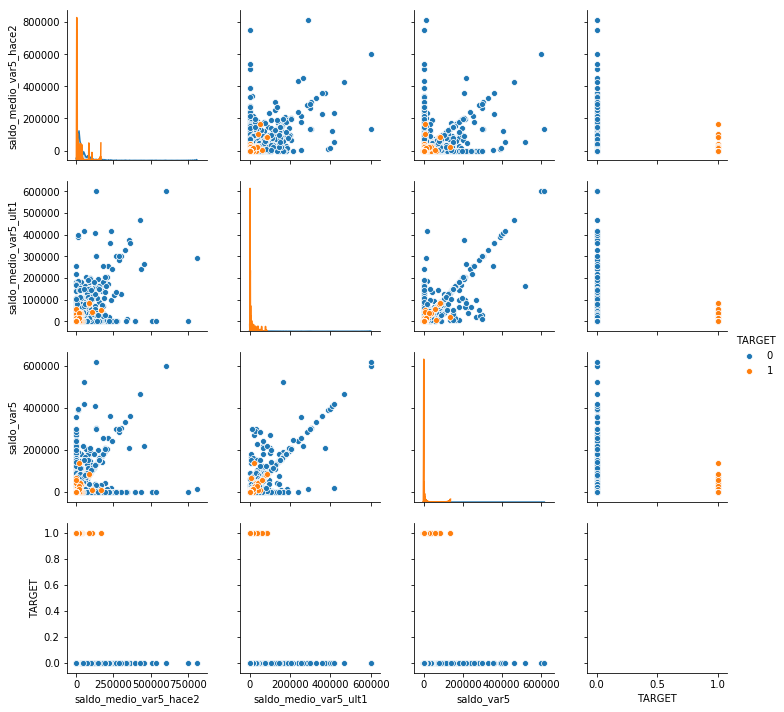

In [15]:
from include.printAssistant import get_seaborn_random_pairplot

# Plot 3 random columns taken from 'cols' of datagram with the TARGET value 
get_seaborn_random_pairplot(datagram=pd_train_filtered, 
                            cols=norm_colUpper10k_candidates, 
                            n_rand_elem=3)



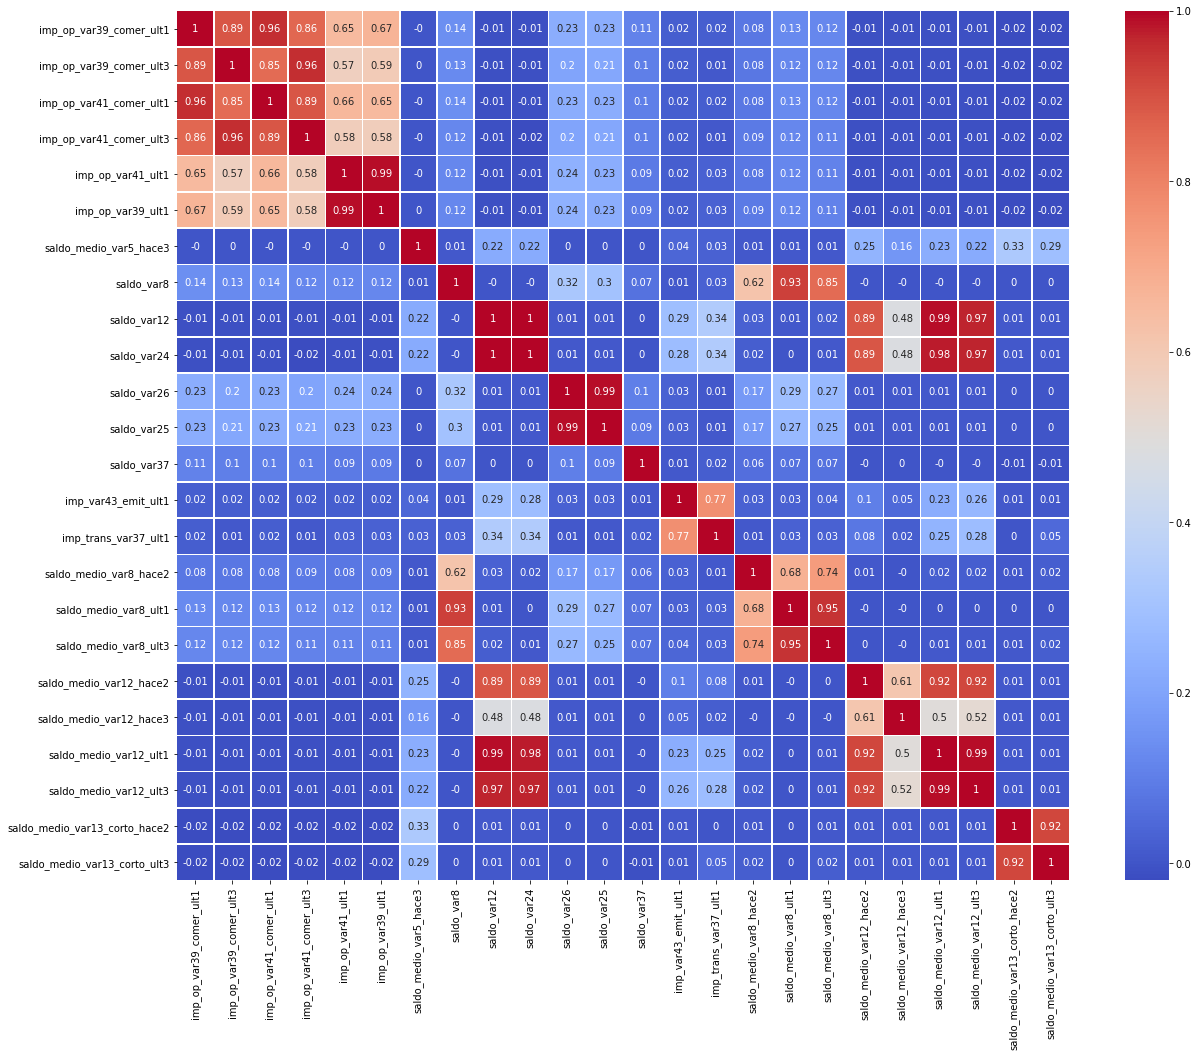

In [29]:
l_col_corrAnalysis = norm_col5k_candidates + norm_col10k_candidates +  norm_colUpper10k_candidates 

from include.printAssistant import get_xcross_plot

get_xcross_plot(pd_train_filtered, norm_col10k_candidates + norm_col5k_candidates)

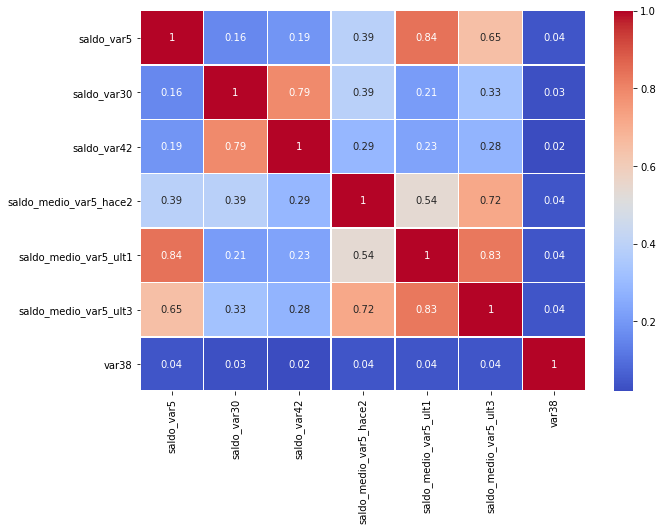

In [34]:
get_xcross_plot(pd_train_filtered, norm_colUpper10k_candidates, figsize=(10,7))

<div class="alert alert-block alert-info" >
Lets do a trivial random forest classifier using all available features
</div>

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


clf = RandomForestClassifier(n_estimators=100, max_depth=3)

X = pd_train_filtered
Y = pd_train.TARGET

def train_test_eq_split(X, y, n_per_class, random_state=None):
    if random_state:
        np.random.seed(random_state)
    sampled = X.groupby(y, sort=False).apply(
        lambda frame: frame.sample(n_per_class))
    mask = sampled.index.get_level_values(1)

    X_train = X.drop(mask)
    X_test = X.loc[mask]
    y_train = y.drop(mask)
    y_test = y.loc[mask]

    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = train_test_eq_split(X, Y, n_per_class=3000)

clf.fit(X_train, y_train)


print("Following features were identified as imporntat by the random forest: ")
print(clf.feature_importances_)


Following features were identified as imporntat by the random forest: 
[2.79974677e-02 6.06124887e-04 3.31670719e-02 4.05944258e-04
 1.36038184e-03 9.68911181e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.25152892e-02
 1.99621992e-02 6.38083746e-04 0.00000000e+00 1.84947001e-03
 0.00000000e+00 2.03327652e-03 2.92255635e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.94040772e-04 7.04142408e-03
 0.00000000e+00 0.00000000e+00 5.70011976e-05 0.00000000e+00
 3.62556735e-03 1.07174029e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.45228169e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.41656823e-03
 2.05430936e-03 8.22269455e-06 1.04660639e-02 4.47131003e-05
 6.56940772e-06 5.87853588e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.33662094e-03 0.00000000e+00
 0.00000000e+0

The AUC value is:  0.5
The test array has  6000  elements


,TRUE,PREDICTION
73810,1,0
23821,1,0
48112,1,0
75745,1,0
30727,1,0
41853,1,0
11217,1,0
51893,1,0
2579,1,0
16129,1,0


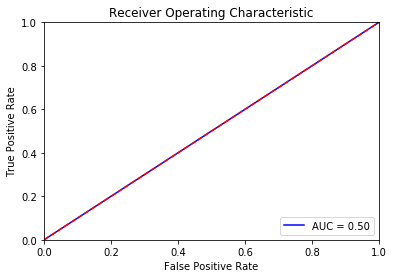

In [56]:
prediction = clf.predict(X_test)

from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
print("The AUC value is: ", roc_auc)

print("The test array has ",len(y_test), " elements")

pd_prediction = pd.DataFrame({"TRUE": y_test, "PREDICTION": prediction})
display(pd_prediction.loc[pd_prediction["TRUE"] == 1])

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<div class="alert alert-block alert-info" >
Lets now only use the double_valued_columns and the tipple valued columns
</div>

Following features were identified as imporntat by the random forest: 
[3.28732778e-04 2.16009874e-03 1.90696236e-02 1.61280087e-01
 0.00000000e+00 0.00000000e+00 6.47950648e-02 2.11274139e-02
 3.47333133e-02 2.37997542e-02 3.96286314e-02 8.69404995e-03
 2.16628706e-02 3.55178076e-03 5.95328210e-03 0.00000000e+00
 0.00000000e+00 4.11902547e-02 7.78664998e-03 4.83846322e-04
 6.39201605e-04 7.49955184e-05 0.00000000e+00 0.00000000e+00
 1.51453225e-04 3.84249094e-03 7.39607081e-04 1.55654129e-02
 2.82610721e-02 7.41952463e-03 1.08896507e-02 4.26243858e-03
 5.93870639e-03 6.45492257e-03 8.53456148e-03 0.00000000e+00
 0.00000000e+00 1.43442204e-03 2.10189831e-01 2.45494856e-04
 4.46532688e-04 7.99307450e-04 2.74345100e-05 3.31524955e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.34274914e-03 1.64066683e-03 1.03013492e-03 2.47109508e-02
 6.19632776e-04 2.12838457e-07 2.22513174e-02 6.32505519e-03
 0.00000000e+00 5.16905260e-04 0.00000000e+00 0.00000000e+00
 1.81098729e-0

,TRUE,PREDICTION
10232,1,0
49385,1,0
75008,1,0
25435,1,0
1862,1,0
65551,1,0
71101,1,0
54494,1,0
53461,1,0
52601,1,0


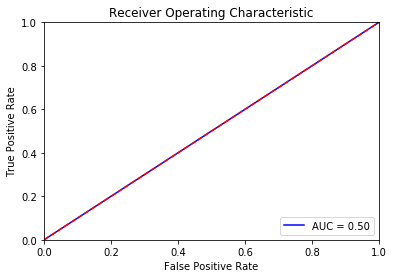

In [67]:
from sklearn.model_selection import train_test_split

clf_singleDouble = RandomForestClassifier(n_estimators=100, max_depth=3)

rf2_cols = doubled_valued_column + tripple_valued_column

X_rf2 = pd_train_filtered[rf2_cols]
Y_rf2 = pd_train_filtered.TARGET

X_train, X_test, y_train, y_test = train_test_split(X_rf2, Y_rf2, test_size=0.01, stratify = Y_rf2)

clf_singleDouble.fit(X_train, y_train)

print("Following features were identified as imporntat by the random forest: ")
print(clf_singleDouble.feature_importances_)

prediction = clf_singleDouble.predict(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
print("The AUC value is: ", roc_auc)

print("The test array has ",len(y_test), " elements")

pd_prediction = pd.DataFrame({"TRUE": y_test, "PREDICTION": prediction})
pd_subPred = pd_prediction.loc[pd_prediction["TRUE"] == 1]
display(pd_subPred.iloc[0:100])

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<div class="alert alert-block alert-info" >
Lets now use the columns with lots of possible values to train a random forest classifier
</div>

Following features were identified as imporntat by the random forest: 
[0.04337902 0.12038947 0.1158188  0.05870736 0.05577903 0.06067595
 0.11702103 0.01303183 0.00455049 0.00285102 0.00556085 0.01429057
 0.0256891  0.0205082  0.01708068 0.01840048 0.00951334 0.03198097
 0.00875325 0.00106204 0.0030323  0.00214372 0.00631605 0.00448243
 0.02440076 0.0300421  0.02938294 0.02417395 0.04363437 0.0470034
 0.04034449]
The AUC value is:  0.502009333080435
The test array has  6082  elements


,TRUE,PREDICTION
570,1,0
11246,1,0
37903,1,0
68844,1,0
6582,1,0
65807,1,0
27949,1,0
2580,1,0
59431,1,0
8258,1,0


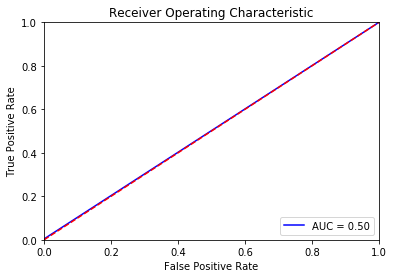

In [72]:
clf_multiVal = RandomForestClassifier(n_estimators=2, max_depth=15)

multiVal_cols = norm_colUpper10k_candidates + norm_col5k_candidates + norm_col10k_candidates

X_multiVal = pd_train_filtered[multiVal_cols]
Y_multiVal = pd_train_filtered.TARGET

X_train, X_test, y_train, y_test = train_test_split(X_multiVal, Y_multiVal, test_size=0.08, stratify = Y_rf2)

clf_multiVal.fit(X_train.values, y_train.values)

print("Following features were identified as imporntat by the random forest: ")
print(clf_multiVal.feature_importances_)

prediction = clf_multiVal.predict(X_test.values)

fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
print("The AUC value is: ", roc_auc)

print("The test array has ",len(y_test), " elements")

pd_prediction = pd.DataFrame({"TRUE": y_test, "PREDICTION": prediction})
pd_subPred = pd_prediction.loc[pd_prediction["TRUE"] == 1]
display(pd_subPred.iloc[0:100])

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



Lets try by applying PCA normalizing the data



In [2]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

low_valued_cols = single_valued_column+doubled_valued_column+tripple_valued_column

cols_temp = [elem for elem in l_feat_cols if elem not in low_valued_cols]
print(len(cols_temp))

X_to_norm = pd_train_filtered[cols_temp].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_norm = min_max_scaler.fit_transform(X_to_norm)

pca = PCA(n_components=10, svd_solver="full")
X = pca.fit_transform(X_norm)
Y = pd_train_filtered.TARGET

clf_pca = RandomForestClassifier(n_estimators=3, max_depth=15, min_samples_split=100)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05, stratify = Y)

clf_pca.fit(X_train, y_train)

print("Following features were identified as imporntat by the random forest: ")
print(clf_pca.feature_importances_)

prediction = clf_pca.predict(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
print("fpr: ", fpr)
roc_auc = metrics.roc_auc_score(y_test, prediction)
print("The AUC value is: ", roc_auc)

print("The test array has ",len(y_test), " elements")

pd_prediction = pd.DataFrame({"TRUE": y_test, "PREDICTION": prediction})
pd_subPred = pd_prediction.loc[pd_prediction["TRUE"] == 1]
display(pd_subPred.iloc[0:5])

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


NameError: name 'single_valued_column' is not defined

In [1]:
import xgboost as xgb